# Projeto Final EA619

## Grupo 4: Convolução de respostas ao sinal de impulso

- Eric Ribeiro Daher - RA: 166946
- Pedro Luiz Teixeira Santoro - RA: 139016
- Rafael Gonçalves - RA: 186062

### Importando bibliotecas

In [1]:
# OS interaction
import os

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt

# Numerical computation
import numpy as np

# Import wav files as np arrays
from scipy.io import wavfile

# Play wav file
from subprocess import call

### Importando respostas ao sinal de impulso

In [2]:
data_path = os.path.abspath(os.path.relpath('../data'))
ir_path = os.path.join(data_path, 'ir/')
out_path = os.path.join(data_path, 'out/')

In [3]:
audio = os.path.join(data_path, 'bethoven.wav')
impulse = os.path.join(data_path, 'impulse.mp3')
ir_files = os.listdir(ir_path)

In [4]:
# call(["xdg-open", audio])
# call(["xdg-open", impulse])

In [5]:
fs, data = wavfile.read(audio)
size_data = np.size(data)

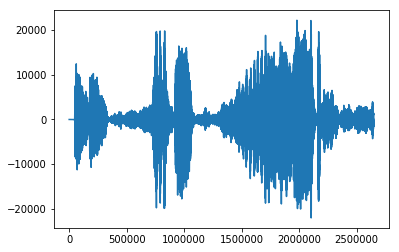

In [6]:
plt.plot(data)

In [7]:
data_fft = np.fft.fft(data)

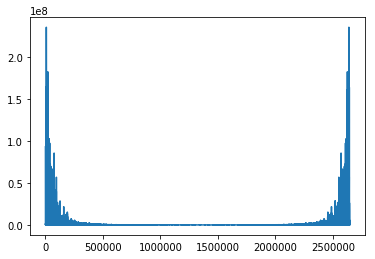

In [8]:
plt.plot(abs(data_fft))

In [9]:
ir = []
for f in ir_files:
    ir.append(wavfile.read(os.path.join(ir_path, f))[1])

In [10]:
ir_fft = []
for e in ir:
    fft = np.fft.fft(e, size_data)
    ir_fft.append(fft)

In [12]:
ans = []
for e in ir_fft:
    ifft = np.fft.ifft(np.multiply(data_fft, e))
    ans.append(ifft*(np.max(abs(data))/np.max(abs(ifft))))

In [13]:
out_files = []
for i, e in enumerate(ans):
    wavfile.write(os.path.join(out_path, ir_files[i].split('.')[0] + '_out.wav'), fs, e.astype('int16'))

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
for i, e in enumerate(ans):
    call(["xdg-open", os.path.join(out_path, ir_files[i].split('.')[0] + '_out.wav')])